In [10]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [11]:
dest = pd.read_csv('./locais/destino.csv')
orig = pd.read_csv('./locais/origem.csv')

In [12]:
distancias = []

In [13]:
dest.drop(columns=['cep'])
orig.drop(columns=['cep'])

,origem,lat,long
0,Cristo Redentor,-22.951916,-43.210487
1,Museu do Ipiranga,-23.585920,-46.609650
2,Estádio do Maracanã,-22.912160,-43.230200
3,Parque Ibirapuera,-23.587416,-46.657634


In [14]:
for index_dest, dest_row in dest.iterrows():
    for index_origa, origa_row in orig.iterrows():
        # Calcular a distância entre as coordenadas de latitude e longitude do destital e da origa atual
        distancia = geodesic((dest_row['lat'], dest_row['long']), (origa_row['lat'], origa_row['long'])).kilometers
        distancia2Dec = round(distancia,3)
        # Adicionar a distância à lista de distâncias
        distancias.append({
            'Origem': origa_row['origem'],
            'Destino': dest_row['destino'],
            'Distancia_km': distancia2Dec
        })

In [15]:
df_distancias = pd.DataFrame(distancias)
df_distancias.head(6)

,Origem,Destino,Distancia_km
0,Cristo Redentor,Praça da Sé,356.472
1,Museu do Ipiranga,Praça da Sé,4.605
2,Estádio do Maracanã,Praça da Sé,355.390
3,Parque Ibirapuera,Praça da Sé,4.782
4,Cristo Redentor,Estação Central do Brasil,5.685
5,Museu do Ipiranga,Estação Central do Brasil,357.817


In [16]:
df_distancias

,Origem,Destino,Distancia_km
0,Cristo Redentor,Praça da Sé,356.472
1,Museu do Ipiranga,Praça da Sé,4.605
2,Estádio do Maracanã,Praça da Sé,355.390
3,Parque Ibirapuera,Praça da Sé,4.782
4,Cristo Redentor,Estação Central do Brasil,5.685
5,Museu do Ipiranga,Estação Central do Brasil,357.817
6,Estádio do Maracanã,Estação Central do Brasil,4.039
7,Parque Ibirapuera,Estação Central do Brasil,362.650
8,Cristo Redentor,Mercado Municipal de São Paulo,355.830
9,Museu do Ipiranga,Mercado Municipal de São Paulo,5.321


In [17]:
pivot_table = df_distancias.pivot_table(index='Origem', columns='Destino', values='Distancia_km')


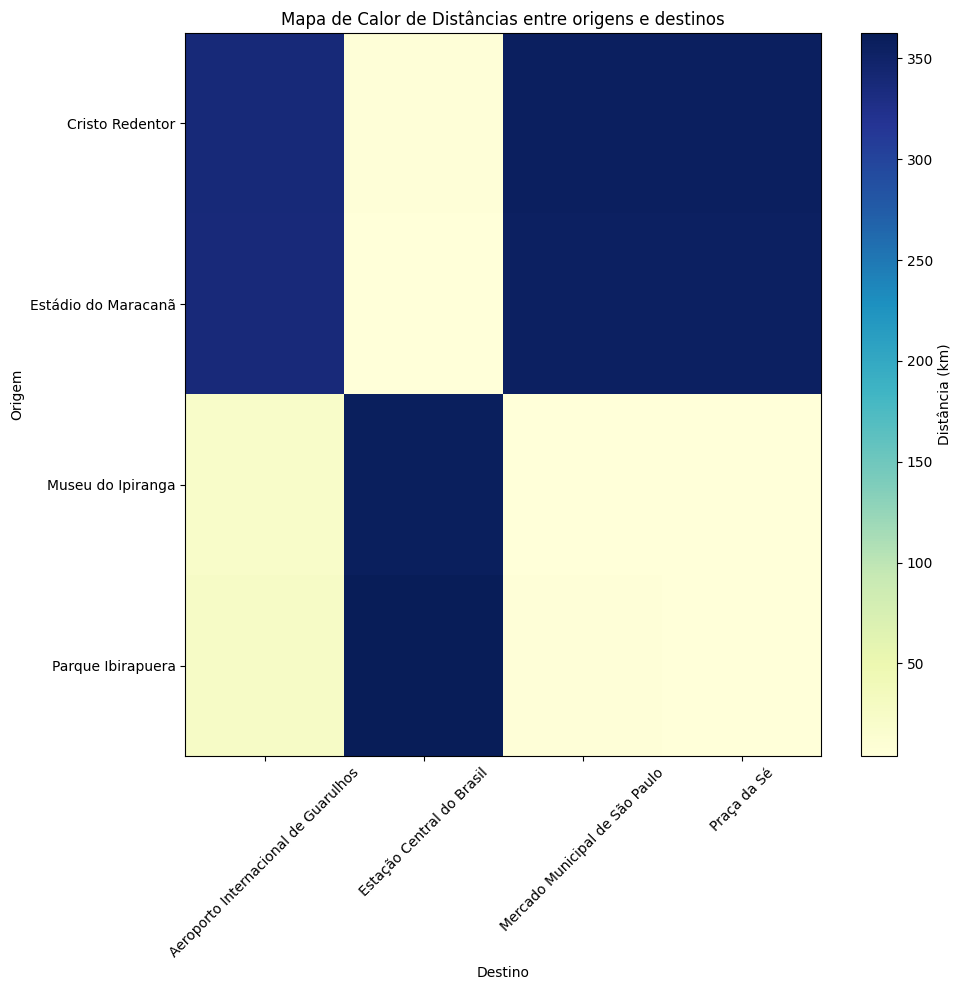

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(pivot_table, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Distância (km)')
plt.title('Mapa de Calor de Distâncias entre origens e destinos')
plt.xlabel('Destino')
plt.ylabel('Origem')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.tight_layout()
plt.show()